In [75]:
#  string
from collections import Counter
from random import choice, randint, random
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


We will learn object orientation today through a simple example. We are going to implement a Garden that has Plants in and there is going to be a Gardener who take care of the Plants. 

First we define the Plant() object. Every Plant() has a unique idetifier or a "name" that its generates for itself with the gen_name() method. As you will see it with most object, when an object is "born" or initalized, it calls its __init__ method which sets the default values of the object. In this particular example a Plant() borns with a particular name, age and with a boolean thats shows that is alive. We store these in self.name, self.age and self.alive and are called "attributes". The plant also have a function inside of it called get_older() which is called a "method" in object oriented terminology (function inside a particular class). If the this method is called with 

    plant = Plant()
    p.get_older()

the age of the plant increases and its energy decreases (this is how life works in this small garden-world).


In [54]:
class Plant():
    
    def gen_name(self, size=6, chars=string.ascii_uppercase + string.digits):
        return ''.join(choice(chars) for _ in range(size))+"_plant"
    
    def __init__(self):
        self.name = self.gen_name()
        self.age = 0
        self.energy = 100
        self.alive = True
        
    def get_older(self):
        # arguments or optional argument to functions/methods
        self.age += 1
        self.energy -= 1
        if self.energy <= 0:
            self.alive = False
        
    def __str__(self):
        return "Name: {}\nAge: {}\nEnergy: {}\nAlive: {}".format(self.name,
                                                     self.age,
                                                     self.energy,
                                                     self.alive)

In [55]:
plant = Plant() # initialize a Plant() object and call it "plant"
print plant

Name: AE3XXN_plant
Age: 0
Energy: 100
Alive: True


As you can see the plant has a special __str__ method. This tells Python what to return when the user says

    print plant
    
we could also return [1,2,3] or "yee".

In [56]:
plant = Plant() # initialize a Plant() object and call it "plant"
print plant

for i in range(10):
    plant.get_older() # call get older
    
print "\n",plant

Name: RCX7S3_plant
Age: 0
Energy: 100
Alive: True

Name: RCX7S3_plant
Age: 10
Energy: 90
Alive: True


As you can see if we call get_older() 10 times on our plant its age increases to 10 and its energy decreases to 90. We can access these properties with the object.attribute syntax.

In [57]:
print plant.age, plant.energy

10 90


Make sure that the plant dies if its energy is 0.

In [58]:
plant = Plant() # initialize a Plant() object and call it "plant"
for i in range(100):
    plant.get_older() # call get older
    
print "\n",plant


Name: VWCI3K_plant
Age: 100
Energy: 0
Alive: False


Cool, now we have the plant done let's get to the Garden(). The Garden is going to be an interesting object as it will have more objects in it!!! But don't worry it is going to be fairly simple. The Garden() object has only one attribute self.flora. It is a list that is going to hold all the Plant() objects. This is how we use here object orientation to MODEL: a garden is something that has plants in it ergo Garden() has a list that has Plant() objects as elements. Fairly starightforward. The Garden() object also has the method grow_plant(), which adds an additional plant to the self.flora list. The most complicated part that the Garden() can handle is in its life_cycle() method. If you call .life_cycle() the Garden() loops through all of its Plant() objects and call their get_older(). The idea here is pretty straightforwards as well: we use the Garden() object to deal with the plants life cycle. Additionally if a plant has died it removes it from the self.flore

In [59]:
class Garden():
    def __init__(self):
        self.flora = []
         
    def grow_plant(self):
        self.flora.append(Plant())
        
    def life_cycle(self):
        offsprings = []
        for plant in self.flora:
            plant.get_older()
            if plant.alive == False:
                self.flora.remove(plant)
                
    def __iter__(self):
        return iter(self.flora)

    def __str__(self):
        return "Plants: {}".format([x.name for x in self.flora])
    

In [60]:
garden = Garden()
print garden

Plants: []


In [61]:
garden.grow_plant()
print garden

Plants: ['UEVSZI_plant']


In [62]:
print garden.flora

[<__main__.Plant instance at 0x7f547abec710>]


In [63]:
print garden.flora[0]

Name: UEVSZI_plant
Age: 0
Energy: 100
Alive: True


In [64]:
class Gardener():
    def __init__(self, garden, diligence=0.5):
        self.garden = garden
        self.diligence = diligence
    
    def decide(self):
        return 1 if random.random() < self.diligence else 0
    
    def place_plant(self):
        self.garden.grow_plant()
        
    def work(self):
        if self.decide() == 1:
            self.place_plant()
            candidate_plant = choice(garden.flora)
            candidate_plant.energy += 10
        else:
            pass
    

In [65]:
garden = Garden()
gardener = Gardener(garden, 0.3)
stats = []

In [72]:
for i in range(100):
    for i in range(1000):
        gardener.work()
        garden.life_cycle()
    stats.append(len(garden.flora))

CPU times: user 1.83 s, sys: 92 ms, total: 1.92 s
Wall time: 1.84 s


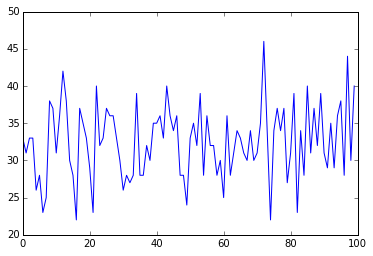

In [67]:
plot(stats)